In [127]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Path del archivo CSV
file_path = "C:/Users/norma/OneDrive/Tecnoquimicas TQ/prueba_tq/data/data_productos.csv"

# Cargar el archivo CSV
df = pd.read_csv(file_path, sep=';')

In [129]:
# Make a list of all the SKU column names
sku_columns = df.columns.tolist()
#sku_columns.remove('Fecha')

# Melt the dataframe
data = df.melt(id_vars=['Fecha'],
                    value_vars=sku_columns,
                    var_name='SKU',
                    value_name='Cantidad')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     2772 non-null   object
 1   SKU       2772 non-null   object
 2   Cantidad  2772 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.1+ KB


In [130]:
# Mostrar las primeras filas del DataFrame
data.head()

,Fecha,SKU,Cantidad
0,1/01/2018,SKU_01,7092
1,1/02/2018,SKU_01,7062
2,1/03/2018,SKU_01,8130
3,1/04/2018,SKU_01,6163
4,1/05/2018,SKU_01,6067


In [131]:
# Cargar el archivo con el formato de fecha correcto
df = pd.read_csv(
    file_path, sep=';',             # Especificar el separador de columnas
    parse_dates=['Fecha'],          # Especificar la columna de fechas
    dayfirst=True                   # Indicar que el formato es DD-MM-YYYY
)

# Configurar la columna 'Fecha' como índice (opcional)
df.set_index('Fecha', inplace=True)

# Verificar el resultado
df.head()

,SKU_01,SKU_02,SKU_03,SKU_04,SKU_05,SKU_06,SKU_07,SKU_08,SKU_09,SKU_10,...,SKU_24,SKU_25,SKU_26,SKU_27,SKU_28,SKU_29,SKU_30,SKU_31,SKU_32,SKU_33
Fecha,,,,,,,,,,,,,,,,,,,,,
2018-01-01,7092,2503,1479,4281,3593,4418,253,524,1155,15438,...,2313,22058,1845,2244,3179,8955,3770,4190,1032,2805
2018-02-01,7062,2786,1451,3705,3349,4416,340,599,895,16179,...,2391,23041,1842,2375,3624,10418,3474,5366,1385,2760
2018-03-01,8130,2733,1497,4481,4218,4920,302,640,899,13218,...,2479,24590,2123,1928,4117,11165,3128,3913,1490,2671
2018-04-01,6163,2434,2153,3733,3317,4895,273,527,1111,15038,...,2399,30199,1865,2372,4600,11539,3669,4969,1448,3202
2018-05-01,6067,2286,1681,4420,3327,4329,331,588,910,12818,...,2852,26760,1446,2461,3731,11482,4418,3898,1251,2949


In [132]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2018-01-01 to 2024-12-01
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SKU_01  84 non-null     int64
 1   SKU_02  84 non-null     int64
 2   SKU_03  84 non-null     int64
 3   SKU_04  84 non-null     int64
 4   SKU_05  84 non-null     int64
 5   SKU_06  84 non-null     int64
 6   SKU_07  84 non-null     int64
 7   SKU_08  84 non-null     int64
 8   SKU_09  84 non-null     int64
 9   SKU_10  84 non-null     int64
 10  SKU_11  84 non-null     int64
 11  SKU_12  84 non-null     int64
 12  SKU_13  84 non-null     int64
 13  SKU_14  84 non-null     int64
 14  SKU_15  84 non-null     int64
 15  SKU_16  84 non-null     int64
 16  SKU_17  84 non-null     int64
 17  SKU_18  84 non-null     int64
 18  SKU_19  84 non-null     int64
 19  SKU_20  84 non-null     int64
 20  SKU_21  84 non-null     int64
 21  SKU_22  84 non-null     int64
 22  SKU_23  84 non-null     int64
 2

In [133]:
# descripción de los datos
describe_df = df.describe()
describe_df = describe_df.round(0).astype(int)
describe_df


,SKU_01,SKU_02,SKU_03,SKU_04,SKU_05,SKU_06,SKU_07,SKU_08,SKU_09,SKU_10,...,SKU_24,SKU_25,SKU_26,SKU_27,SKU_28,SKU_29,SKU_30,SKU_31,SKU_32,SKU_33
count,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
mean,6724,2663,1674,4006,3214,4251,290,552,957,14926,...,2469,23438,1826,2314,3776,10912,3856,4278,1284,2897
std,1114,467,292,682,1247,1034,72,88,160,6282,...,470,5175,649,658,848,3132,676,1167,187,710
min,4648,1880,880,2582,1289,2629,86,351,647,5417,...,1389,13340,691,967,1824,3263,2234,2052,765,1387
25%,5904,2315,1501,3551,2688,3628,241,497,869,12806,...,2236,20198,1513,2038,3266,9579,3520,3496,1160,2552
50%,6589,2679,1702,3994,3176,4258,288,556,954,15070,...,2416,23270,1767,2282,3786,11048,3900,4214,1288,2880
75%,7233,2932,1837,4474,3495,4767,325,604,1090,16274,...,2704,25702,1990,2518,4272,12132,4342,4977,1416,3196
max,10870,4321,2658,5771,11592,9620,482,841,1387,48990,...,4480,43420,4719,4835,6953,22480,5419,7500,1727,5912


In [134]:
# Comprobar valores nulos total
df.isnull().sum().sum()

np.int64(0)

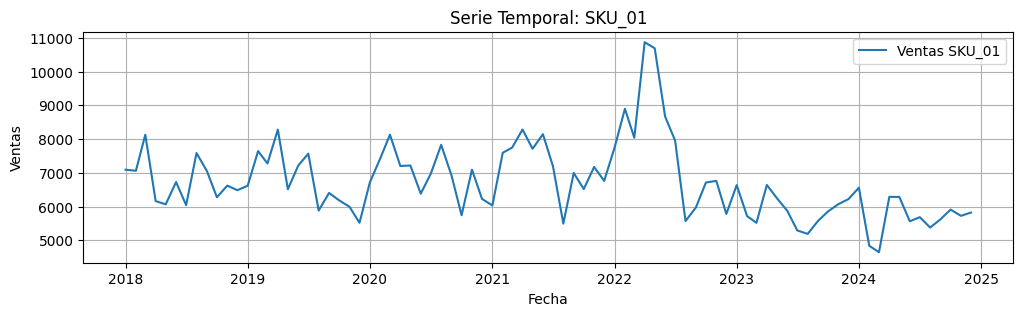

In [135]:
# Visualización de un SKU en particular (por ejemplo, SKU_01)
plt.figure(figsize=(12, 3))
plt.plot(df.index, df['SKU_01'], label='Ventas SKU_01')
plt.title("Serie Temporal: SKU_01")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.grid()
plt.show()

In [136]:
df.head()

,SKU_01,SKU_02,SKU_03,SKU_04,SKU_05,SKU_06,SKU_07,SKU_08,SKU_09,SKU_10,...,SKU_24,SKU_25,SKU_26,SKU_27,SKU_28,SKU_29,SKU_30,SKU_31,SKU_32,SKU_33
Fecha,,,,,,,,,,,,,,,,,,,,,
2018-01-01,7092,2503,1479,4281,3593,4418,253,524,1155,15438,...,2313,22058,1845,2244,3179,8955,3770,4190,1032,2805
2018-02-01,7062,2786,1451,3705,3349,4416,340,599,895,16179,...,2391,23041,1842,2375,3624,10418,3474,5366,1385,2760
2018-03-01,8130,2733,1497,4481,4218,4920,302,640,899,13218,...,2479,24590,2123,1928,4117,11165,3128,3913,1490,2671
2018-04-01,6163,2434,2153,3733,3317,4895,273,527,1111,15038,...,2399,30199,1865,2372,4600,11539,3669,4969,1448,3202
2018-05-01,6067,2286,1681,4420,3327,4329,331,588,910,12818,...,2852,26760,1446,2461,3731,11482,4418,3898,1251,2949


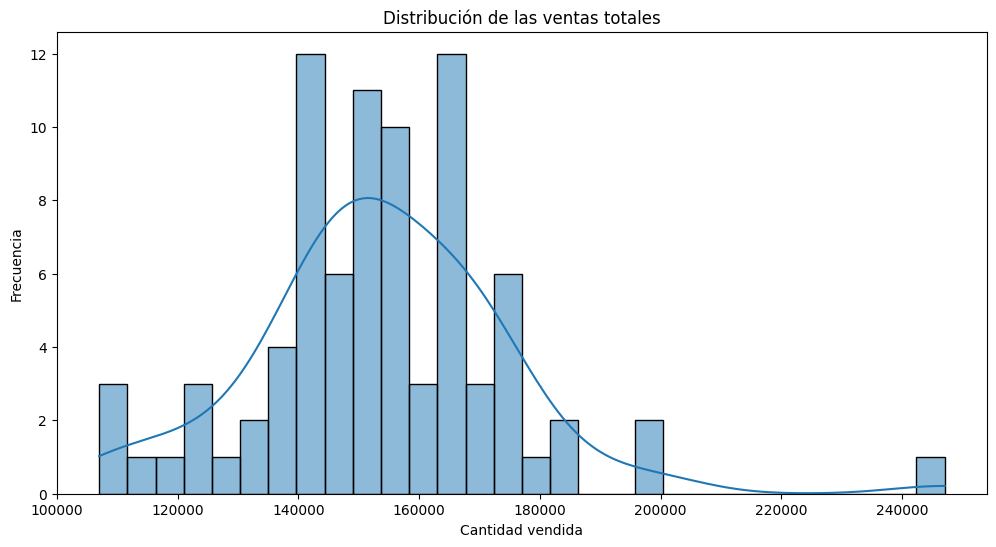

In [137]:
# Visualización de las ventas totales (suma de todos los SKUs)
df['total_sales'] = df.sum(axis=1) # Sumar las ventas de todos los SKUs

# Distribución de ventas
plt.figure(figsize=(12, 6))
sns.histplot(df['total_sales'], bins=30, kde=True)
plt.title('Distribución de las ventas totales')
plt.xlabel('Cantidad vendida')
plt.ylabel('Frecuencia')
plt.show()

In [138]:
# Serie SKU_01 con plotly
fig_sku = go.Figure()
fig_sku.add_trace(go.Scatter(x=df.index, y=df['SKU_01'], mode='lines', name='SKU_01'))

fig_sku.update_layout(
    title="Serie Temporal: SKU_01",
    xaxis_title="Fecha",
    yaxis_title="Ventas",
    template="plotly_white",
    hovermode="x"
)

fig_sku.show()

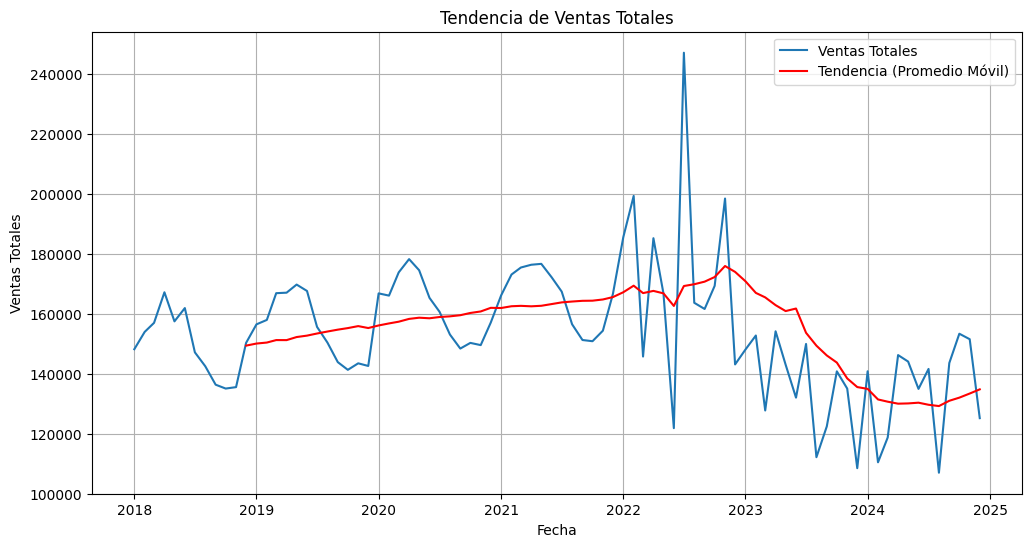

In [139]:
# Cálculo de promedio móvil para ventas totales
df['total_sales_rolling_mean'] = df['total_sales'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['total_sales'], label='Ventas Totales')
plt.plot(df.index, df['total_sales_rolling_mean'], label='Tendencia (Promedio Móvil)', color='red')
plt.title("Tendencia de Ventas Totales")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.legend()
plt.grid()
plt.show()

In [140]:
# 1. ANÁLISIS INDIVIDUAL DE SERIES
def analizar_serie_individual(serie, nombre_serie, periodo=12):
    """
    Análisis completo de una serie temporal individual
    """
    fig = plt.figure(figsize=(20, 12))
    
    # Visualización de la serie
    plt.subplot(321)
    plt.plot(serie)
    plt.title(f'Serie Temporal - {nombre_serie}')
    plt.xticks(rotation=45)
    
    # Descomposición de la serie Análisis STL (Seasonal-Trend decomposition using LOESS) 
    stl = STL(serie, period=periodo)
    resultado_stl = stl.fit()
    
    # Tendencia
    plt.subplot(322)
    plt.plot(resultado_stl.trend)
    plt.title('Tendencia (STL)')
    plt.xticks(rotation=45)
    
    # Estacionalidad
    plt.subplot(323)
    plt.plot(resultado_stl.seasonal)
    plt.title('Componente Estacional (STL)')
    plt.xticks(rotation=45)
    
    # Residuos
    plt.subplot(324)
    plt.plot(resultado_stl.resid)
    plt.title('Residuos (STL)')
    plt.xticks(rotation=45)
    
    # 1.3 Análisis de Autocorrelación
    plt.subplot(325)
    sm.graphics.tsa.plot_acf(serie.dropna(), lags=24, ax=plt.gca())
    plt.title('Autocorrelación')
    
    plt.subplot(326)
    sm.graphics.tsa.plot_pacf(serie.dropna(), lags=24, ax=plt.gca())
    plt.title('Autocorrelación Parcial')
    
    plt.tight_layout()
    
    # 1.4 Estadísticas descriptivas y tests
    stats_dict = {
        'Estadísticas Básicas': {
            'Media': serie.mean(),
            'Mediana': serie.median(),
            'Desv. Est.': serie.std(),
            'CV': serie.std() / serie.mean() * 100,
            'Asimetría': serie.skew(),
            'Curtosis': serie.kurtosis()
        }
    }
    
    # Test de estacionariedad
    adf_test = adfuller(serie.dropna())
    kpss_test = kpss(serie.dropna())
    
    stats_dict['Tests de Estacionariedad'] = {
        'ADF Statistic': adf_test[0],
        'ADF p-value': adf_test[1],
        'KPSS Statistic': kpss_test[0],
        'KPSS p-value': kpss_test[1]
    }
    
    # Análisis de estacionalidad
    stats_dict['Análisis Estacional'] = {
        'Fuerza Tendencia': 1 - np.var(resultado_stl.resid) / np.var(resultado_stl.trend + resultado_stl.resid),
        'Fuerza Estacional': 1 - np.var(resultado_stl.resid) / np.var(resultado_stl.seasonal + resultado_stl.resid)
    }
    
    # 1.5 Análisis adicionales
    # Boxplot por mes
    plt.figure(figsize=(12, 6))
    serie_mensual = pd.DataFrame({
        'mes': serie.index.month,
        'valor': serie.values
    })
    sns.boxplot(data=serie_mensual, x='mes', y='valor')
    plt.title('Distribución Mensual')
    plt.xlabel('Mes')
    plt.ylabel('Valor')
    
    # Histograma y QQ plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(serie, kde=True, ax=ax1)
    ax1.set_title('Distribución de Valores')
    
    stats.probplot(serie, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')
    
    return stats_dict, resultado_stl

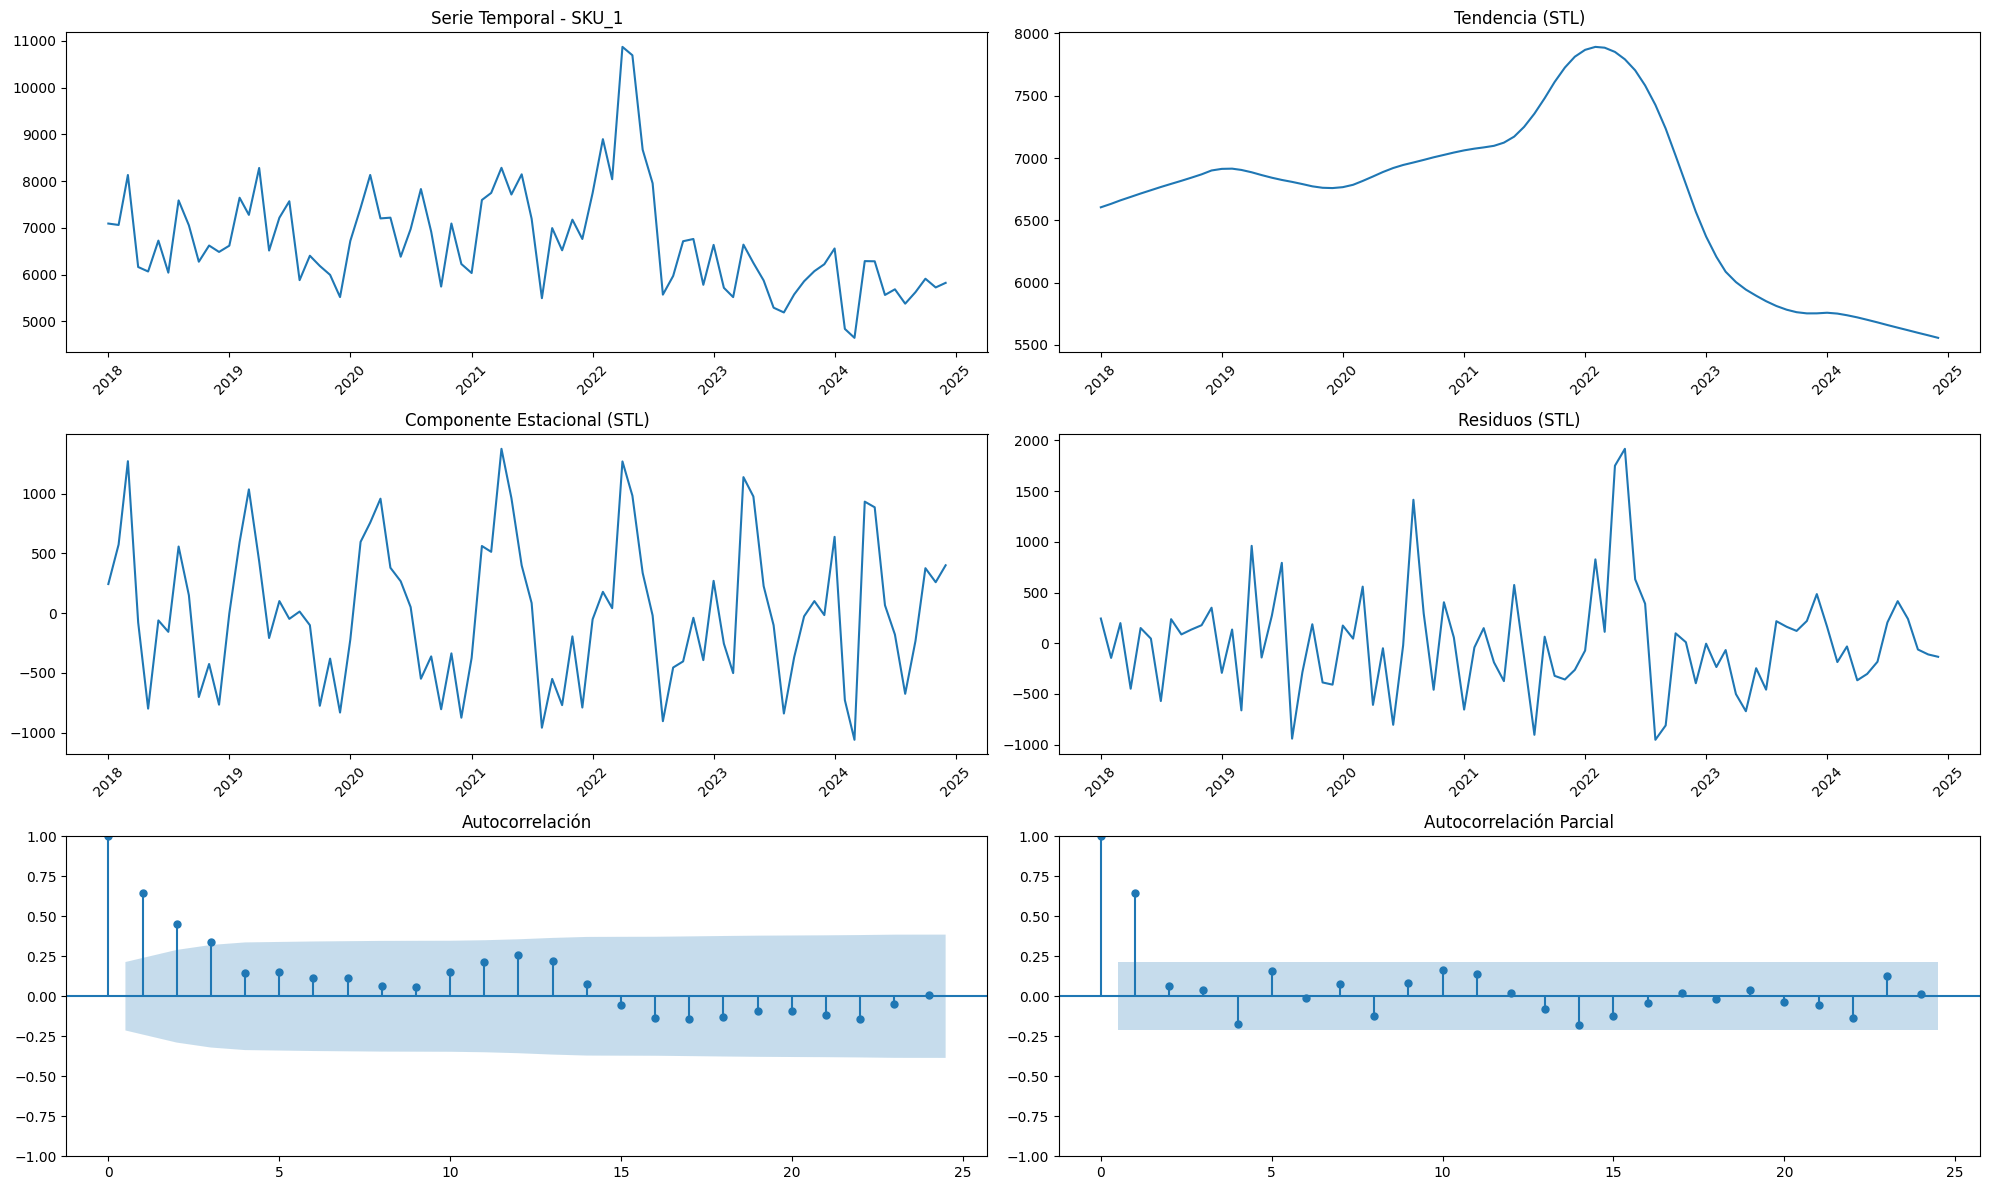

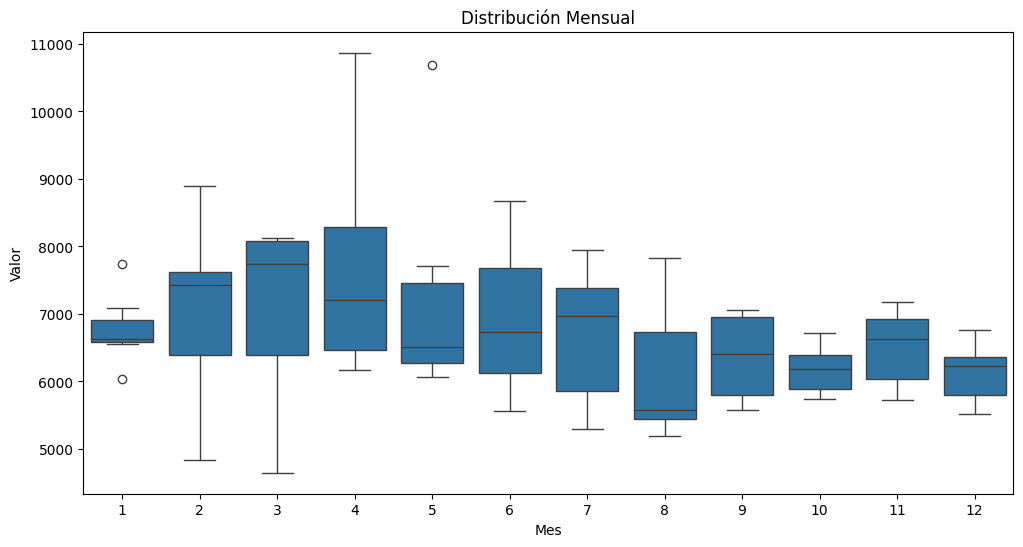

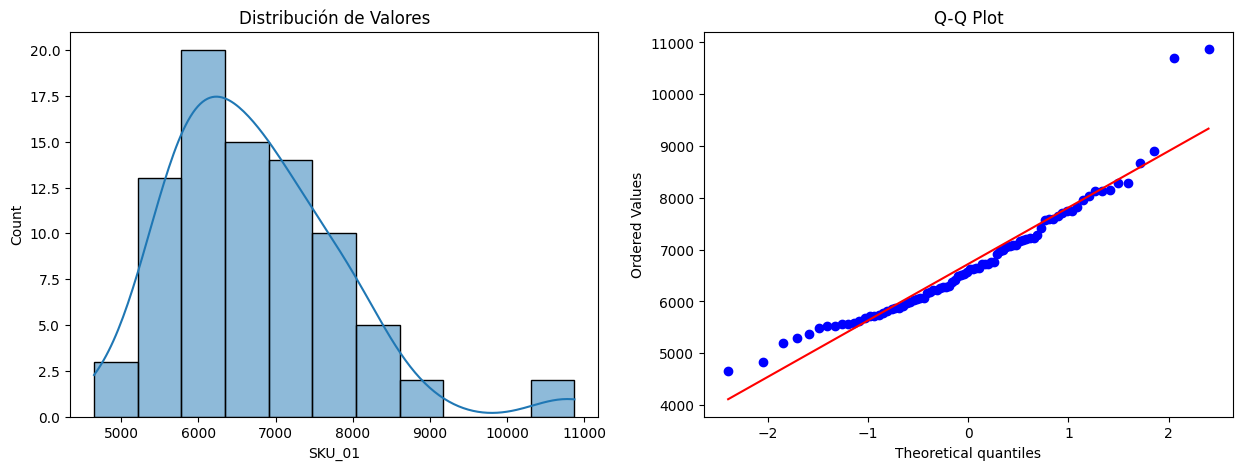

In [141]:
# 1. Análisis individual de una serie
serie = df['SKU_01']
stats, stl_result = analizar_serie_individual(serie, 'SKU_1')

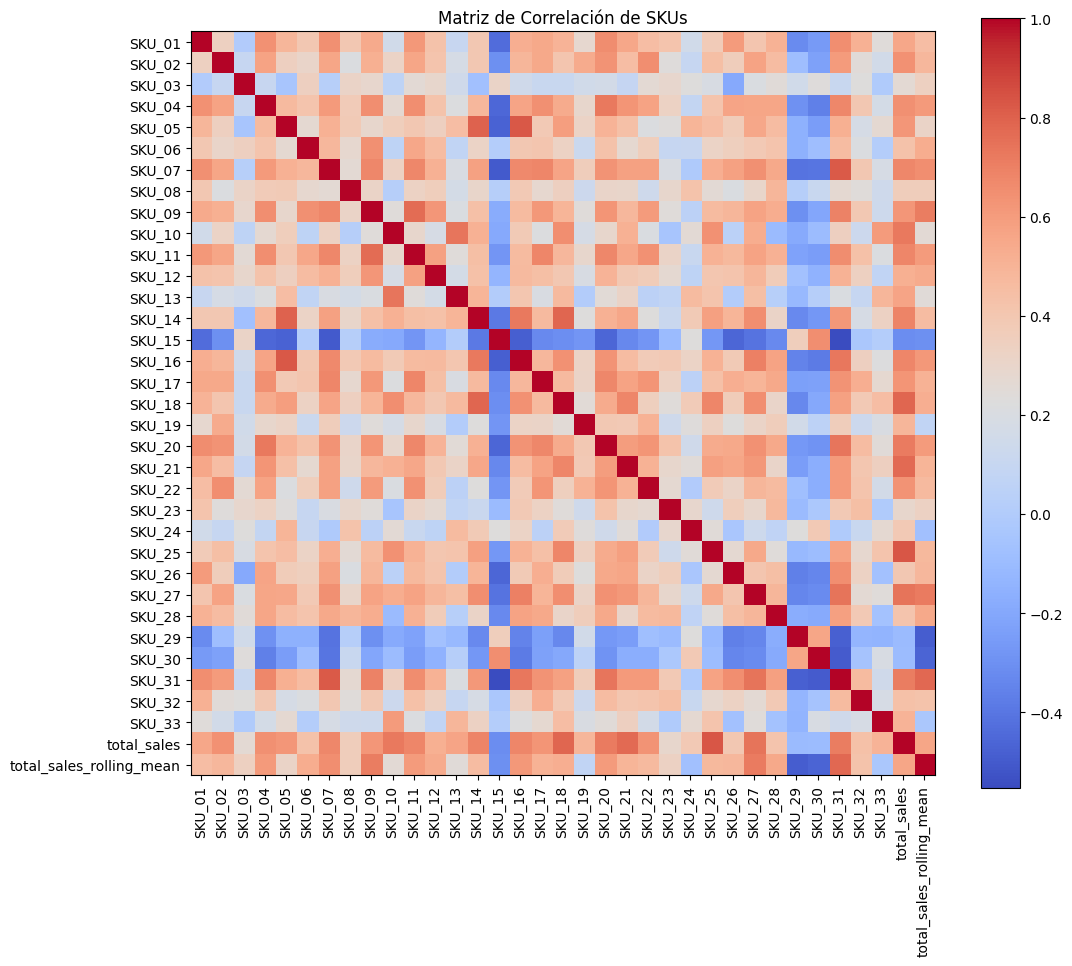

In [142]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación (mapa de calor)
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Matriz de Correlación de SKUs')
plt.show()

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     2772 non-null   object
 1   SKU       2772 non-null   object
 2   Cantidad  2772 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.1+ KB


### Análisis de Outliers

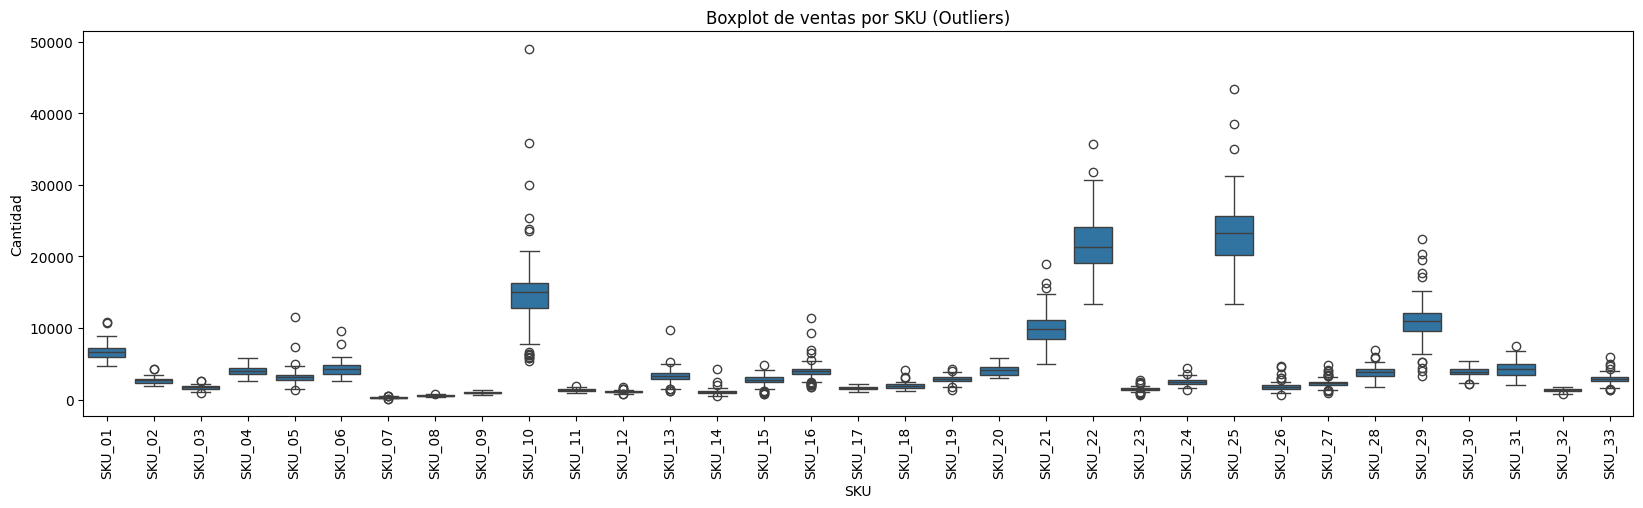

In [144]:
# Outliers por SKU (Boxplot)
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, x='SKU', y='Cantidad')
plt.title('Boxplot de ventas por SKU (Outliers)')
plt.xticks(rotation=90)
plt.show()

### Detección de Outliers

In [145]:
# análisis inicial
sku = 'SKU_01'
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')
serie_sku = data[data['SKU'] == sku].set_index('Fecha')['Cantidad']
serie_sku.index = pd.to_datetime(serie_sku.index)

In [146]:
# Descomposición STL
stl = STL(serie_sku, period=12, seasonal=13)
result = stl.fit()

In [147]:
# Extraer componentes
tendencia = result.trend
estacionalidad = result.seasonal
residuo = result.resid

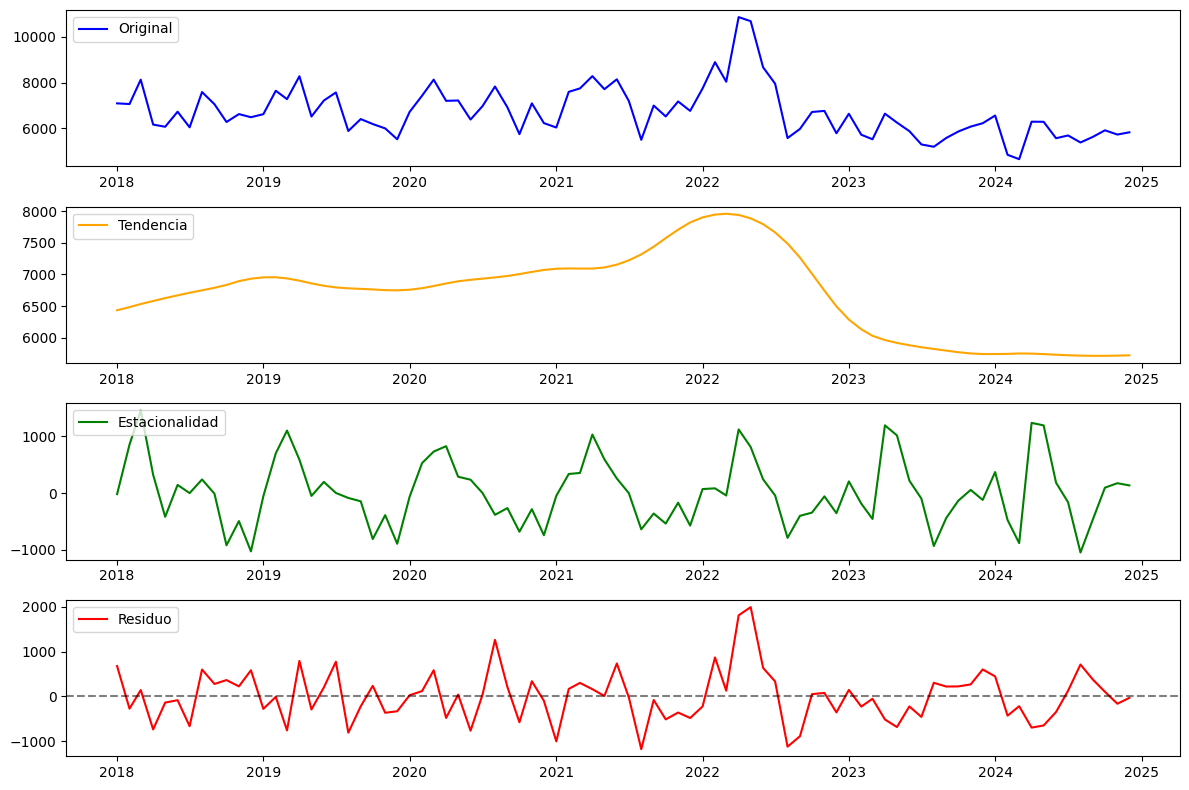

In [148]:
# Graficar descomposición
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(serie_sku, label="Original", color='blue')
plt.legend(loc="upper left")
plt.subplot(4, 1, 2)
plt.plot(tendencia, label="Tendencia", color='orange')
plt.legend(loc="upper left")
plt.subplot(4, 1, 3)
plt.plot(estacionalidad, label="Estacionalidad", color='green')
plt.legend(loc="upper left")
plt.subplot(4, 1, 4)
plt.plot(residuo, label="Residuo", color='red')
plt.axhline(0, linestyle='--', color='black', alpha=0.5)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [149]:
# Detección de outliers en residuos IQR (Rango Intercuartílico)
Q1 = residuo.quantile(0.25)
Q3 = residuo.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

outliers = residuo[(residuo < outlier_threshold_low) | (residuo > outlier_threshold_high)]

# Mostrar resultados
print(f"Outliers encontrados: {len(outliers)}")
print(outliers)

Outliers encontrados: 3
Fecha
2020-08-01    1261.382185
2022-04-01    1809.089992
2022-05-01    1992.816493
Name: resid, dtype: float64


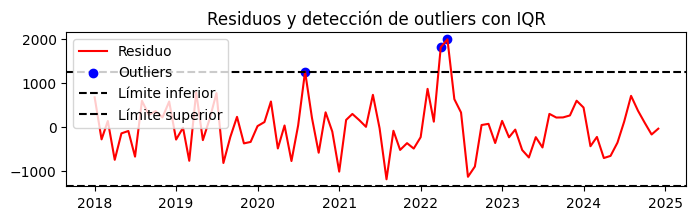

In [150]:
# Graficar residuos y outliers
plt.figure(figsize=(8, 2))
plt.plot(residuo, label="Residuo", color='red')
plt.scatter(outliers.index, outliers, color='blue', label="Outliers")
plt.axhline(outlier_threshold_low, color='black', linestyle='--', label="Límite inferior")
plt.axhline(outlier_threshold_high, color='black', linestyle='--', label="Límite superior")
plt.legend(loc="upper left")
plt.title("Residuos y detección de outliers con IQR")
plt.show()

In [151]:
# Guardar resultados detección de outliers con IQR
outliers_df.to_csv("C:/Users/norma/OneDrive/Tecnoquimicas TQ/prueba_tq/data/outliers_IQR.csv", index=False)

In [152]:
def graficar_outliers_stl(data, sku, periodo=12):
    """
    Detección y visualización de outliers en la serie de tiempo de un SKU utilizando STL
    """
    # Filtrar la serie de tiempo del SKU
    serie_sku = data[data['SKU'] == sku].set_index('Fecha')['Cantidad']
    serie_sku.index = pd.to_datetime(serie_sku.index)
    
    # Descomposición STL
    stl = STL(serie_sku, period=periodo, seasonal=13)
    result = stl.fit()
    
    # Extraer componentes
    tendencia = result.trend
    estacionalidad = result.seasonal
    residuo = result.resid
    
    # Cálculo de límites de outliers basado en la desviación estándar
    residuo_mean = residuo.mean()
    residuo_std = residuo.std()
    outlier_threshold_low = residuo_mean - 3 * residuo_std
    outlier_threshold_high = residuo_mean + 3 * residuo_std
    
    # Identificar outliers
    outliers = residuo[(residuo < outlier_threshold_low) | (residuo > outlier_threshold_high)]
    
    # Crear figura interactiva con Plotly
    fig = go.Figure()

    # Serie original
    fig.add_trace(go.Scatter(x=serie_sku.index, y=serie_sku, mode='lines', name='Cantidad', line=dict(color='blue')))
    
    # Tendencia
    fig.add_trace(go.Scatter(x=serie_sku.index, y=tendencia, mode='lines', name='Tendencia', line=dict(color='orange')))
    
    # Estacionalidad
    fig.add_trace(go.Scatter(x=serie_sku.index, y=estacionalidad, mode='lines', name='Estacionalidad', line=dict(color='green')))
    
    # Residuos
    fig.add_trace(go.Scatter(x=serie_sku.index, y=residuo, mode='lines', name='Residuales', line=dict(color='purple')))
    
    # Outliers
    fig.add_trace(go.Scatter(
        x=outliers.index, y=outliers, mode='markers', name='Outliers',
        marker=dict(color='red', size=10, symbol='circle')
    ))
    
    # Configuración del diseño del gráfico
    fig.update_layout(
        title=f"STL y Outliers Detectados con STL - SKU: {sku}",
        xaxis_title="Fecha",
        yaxis_title="Cantidad",
        legend_title="Componentes",
        template="plotly_white",
        height=600,
        width=1000
    )
    
    # Límites de outliers
    fig.add_hline(y=outlier_threshold_low, line=dict(color='red', dash='dot'), name='Límite Inferior')
    fig.add_hline(y=outlier_threshold_high, line=dict(color='red', dash='dot'), name='Límite Superior')

    fig.show()

In [153]:
graficar_outliers_stl(data, sku='SKU_01', periodo=12)

In [154]:
# Detección de outliers con STL todos los SKU
outliers_summary = []

# Procesar cada SKU
for sku in data['SKU'].unique():
    # Filtrar la serie por SKU y establecer la fecha como índice
    serie_sku = data[data['SKU'] == sku].set_index('Fecha')['Cantidad']
    
    # Asegurarse de que la serie esté ordenada por fecha
    serie_sku = serie_sku.sort_index()
    
    # Descomposición STL
    stl = STL(serie_sku, seasonal=13, robust=True)  # Aseguramos periodicidad mensual
    result = stl.fit()
    residuo = result.resid  # Extraer residuales
    
    # Cálculo de límites de outliers basado en la desviación estándar
    residuo_mean = residuo.mean()
    residuo_std = residuo.std()
    outlier_threshold_low = residuo_mean - 3 * residuo_std
    outlier_threshold_high = residuo_mean + 3 * residuo_std
    
    # Identificar outliers
    outliers = residuo[(residuo < outlier_threshold_low) | (residuo > outlier_threshold_high)]
    
    # Guardar los resultados
    for date, value in outliers.items():
        outliers_summary.append({'SKU': sku, 'Fecha': date, 'Residuo': value})

# Convertir a DataFrame final
outliers_df = pd.DataFrame(outliers_summary)

# Ordenar por SKU y Fecha, visualizar los primeros registros
outliers_df = outliers_df.sort_values(by=['SKU', 'Fecha']).reset_index(drop=True)
outliers_df.head()

,SKU,Fecha,Residuo
0,SKU_01,2022-04-01,3402.788601
1,SKU_01,2022-05-01,3493.356703
2,SKU_02,2022-08-01,1754.326382
3,SKU_02,2022-09-01,1519.544406
4,SKU_03,2018-04-01,832.330307


In [155]:
# Guardar resultados detección de outliers con STL
outliers_df.to_csv("C:/Users/norma/OneDrive/Tecnoquimicas TQ/prueba_tq/data/outliers_STL.csv", index=False)

### Prueba de Ljung-box (Autocorelación)

In [156]:
def analisis_ljung_box(data, sku, lags=12, periodo=12):
    """
    Análisis completo para un SKU utilizando la prueba de Ljung-Box
    para verificar autocorrelación en los residuos después de la descomposición STL.
    
    Parámetros:
        - data: DataFrame con columnas ['Fecha', 'SKU', 'Cantidad'].
        - sku: Identificador del SKU a analizar.
        - lags: Número de rezagos a considerar para la prueba de Ljung-Box.
        - periodo: Periodo de la estacionalidad (e.g., 12 para datos mensuales).
    """
    # Filtrar la serie de tiempo del SKU
    serie_sku = data[data['SKU'] == sku].set_index('Fecha')['Cantidad']
    serie_sku.index = pd.to_datetime(serie_sku.index)
    
    # Descomposición STL
    stl = STL(serie_sku, period=periodo, seasonal=13)
    result = stl.fit()
    
    # Extraer residuos
    residuo = result.resid
    
    # Prueba de Ljung-Box
    lb_test = acorr_ljungbox(residuo, lags=lags, return_df=True)
    
    # Gráficos
    fig = go.Figure()

    # Gráfico de residuos
    fig.add_trace(go.Scatter(
        x=residuo.index, y=residuo, mode='lines+markers',
        name='Residuales', line=dict(color='blue')
    ))
    
    # Líneas de referencia (media de residuos)
    fig.add_hline(y=0, line=dict(color='red', dash='dot'), name="Media Residual")
    
    fig.update_layout(
        title=f"Residuos de STL - SKU: {sku}",
        xaxis_title="Fecha",
        yaxis_title="Residuales",
        template="plotly_white",
        height=400
    )
    
    fig.show()

    # Gráfico de autocorrelación
    sm.graphics.tsa.plot_acf(residuo, lags=lags, title=f"ACF de Residuos - SKU: {sku}")
    sm.graphics.tsa.plot_pacf(residuo, lags=lags, title=f"PACF de Residuos - SKU: {sku}")
    
    # Resultados de Ljung-Box
    print(f"Resultados de la Prueba de Ljung-Box para {sku}:")
    print(lb_test)

    # Interpretación del resultado
    significativos = lb_test[lb_test['lb_pvalue'] < 0.05]
    if len(significativos) > 0:
        print("\n¡Autocorrelación significativa detectada en los siguientes rezagos!")
        print(significativos)
    else:
        print("\nNo se detectó autocorrelación significativa en los residuos.")
        
    return lb_test

Resultados de la Prueba de Ljung-Box para SKU_25:
      lb_stat     lb_pvalue
1    4.803701  2.839867e-02
2    5.113029  7.757465e-02
3    9.133813  2.756368e-02
4   11.980452  1.749723e-02
5   12.263839  3.134607e-02
6   14.385537  2.561381e-02
7   23.748295  1.261390e-03
8   24.194521  2.125818e-03
9   24.762885  3.244980e-03
10  26.518500  3.101992e-03
11  27.581033  3.751274e-03
12  38.296258  1.373379e-04
13  39.792374  1.492824e-04
14  39.906251  2.638529e-04
15  41.126180  3.059297e-04
16  43.025852  2.769561e-04
17  50.062312  4.130960e-05
18  52.663796  2.957028e-05
19  60.226492  3.563211e-06
20  61.631496  3.970165e-06
21  62.019925  6.287276e-06
22  63.233803  7.333633e-06
23  65.507679  5.883530e-06
24  73.177814  7.146045e-07

¡Autocorrelación significativa detectada en los siguientes rezagos!
      lb_stat     lb_pvalue
1    4.803701  2.839867e-02
3    9.133813  2.756368e-02
4   11.980452  1.749723e-02
5   12.263839  3.134607e-02
6   14.385537  2.561381e-02
7   23.748295

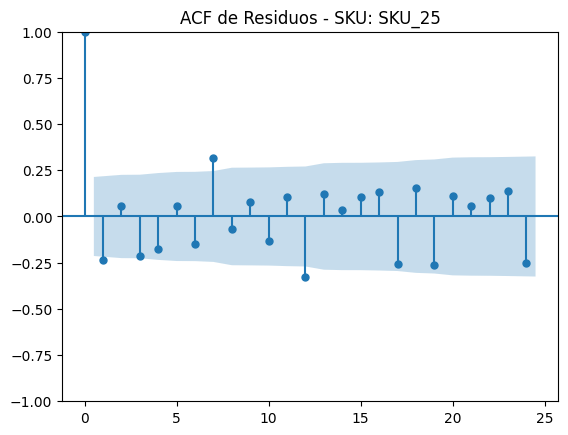

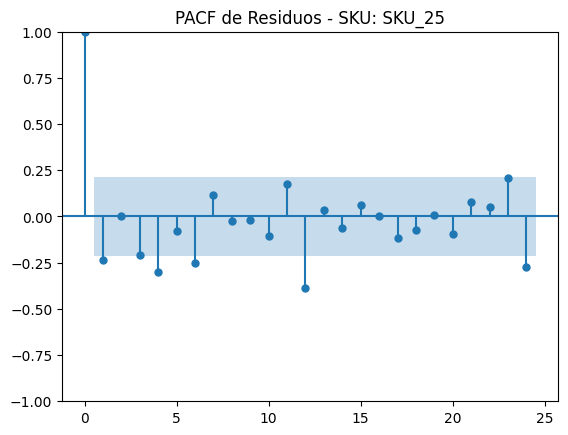

In [157]:
resultado_ljung_box = analisis_ljung_box(data, sku='SKU_25', lags=24, periodo=12)

Resultados de la Prueba de Ljung-Box para SKU_29:
      lb_stat  lb_pvalue
1    0.003550   0.952491
2    5.446511   0.065661
3   13.633642   0.003449
4   14.012559   0.007255
5   20.668815   0.000935
6   20.749611   0.002035
7   30.569777   0.000075
8   31.133001   0.000133
9   31.171889   0.000277
10  32.368091   0.000348
11  32.878284   0.000551
12  35.735808   0.000357
13  36.143781   0.000564
14  36.410987   0.000905
15  36.426315   0.001534
16  36.725711   0.002292
17  41.063149   0.000914
18  41.108765   0.001471
19  50.336546   0.000117
20  50.925607   0.000163
21  54.287399   0.000090
22  55.918844   0.000088
23  55.938401   0.000144
24  67.132163   0.000006

¡Autocorrelación significativa detectada en los siguientes rezagos!
      lb_stat  lb_pvalue
3   13.633642   0.003449
4   14.012559   0.007255
5   20.668815   0.000935
6   20.749611   0.002035
7   30.569777   0.000075
8   31.133001   0.000133
9   31.171889   0.000277
10  32.368091   0.000348
11  32.878284   0.000551
12  35

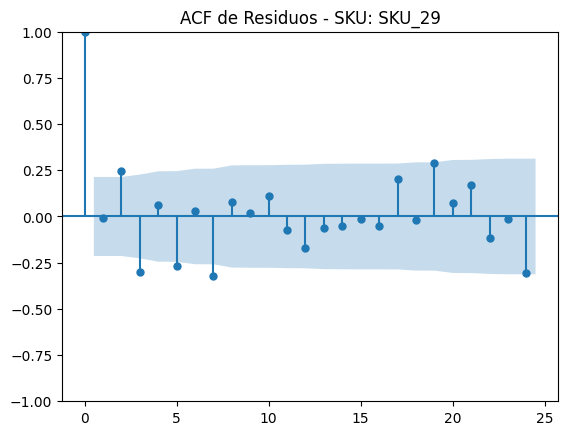

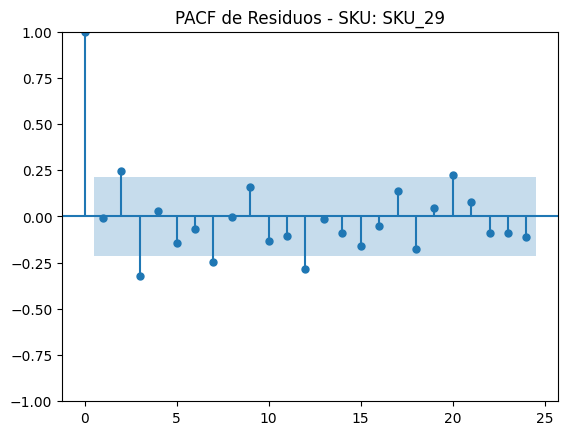

In [158]:
resultado_ljung_box = analisis_ljung_box(data, sku='SKU_29', lags=24, periodo=12)

### Prueba de Dickey-Fuller aumentada (ADF)

In [159]:
def prueba_dickey_fuller(data, sku, periodo=12):
    """
    Realiza la prueba de Dickey-Fuller aumentada (ADF) para evaluar la estacionariedad
    de la serie de tiempo de un SKU específico.

    Parámetros:
        - data: DataFrame con columnas ['Fecha', 'SKU', 'Cantidad'].
        - sku: Identificador del SKU a analizar.
        - periodo: Periodo de estacionalidad para gráficos.

    Retorna:
        - Resultados de la prueba ADF.
    """
    # Filtrar la serie de tiempo del SKU
    serie_sku = data[data['SKU'] == sku].set_index('Fecha')['Cantidad']
    serie_sku.index = pd.to_datetime(serie_sku.index)
    
    # Realizar la prueba Dickey-Fuller aumentada (ADF)
    adf_result = adfuller(serie_sku, autolag='AIC')
    
    # Imprimir resultados
    print(f"Resultados de la Prueba Dickey-Fuller Aumentada (ADF) para SKU: {sku}")
    print(f"Estadístico ADF: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Número de rezagos usados: {adf_result[2]}")
    print(f"Número de observaciones: {adf_result[3]}")
    print("\nValores críticos:")
    for key, value in adf_result[4].items():
        print(f"  {key}: {value}")

    # Interpretación
    if adf_result[1] < 0.05:
        print("\nConclusión: La serie es estacionaria (se rechaza la hipótesis nula).")
    else:
        print("\nConclusión: La serie no es estacionaria (no se puede rechazar la hipótesis nula).")
    
    return adf_result

In [160]:
resultado_adf = prueba_dickey_fuller(data, sku='SKU_25', periodo=12)

Resultados de la Prueba Dickey-Fuller Aumentada (ADF) para SKU: SKU_25
Estadístico ADF: -4.003960767257709
p-value: 0.0013899129282733172
Número de rezagos usados: 1
Número de observaciones: 82

Valores críticos:
  1%: -3.512738056978279
  5%: -2.8974898650628984
  10%: -2.585948732897085

Conclusión: La serie es estacionaria (se rechaza la hipótesis nula).


In [161]:
resultado_adf = prueba_dickey_fuller(data, sku='SKU_29', periodo=12)

Resultados de la Prueba Dickey-Fuller Aumentada (ADF) para SKU: SKU_29
Estadístico ADF: -0.7088634186315745
p-value: 0.844440335105431
Número de rezagos usados: 3
Número de observaciones: 80

Valores críticos:
  1%: -3.5148692050781247
  5%: -2.8984085156250003
  10%: -2.58643890625

Conclusión: La serie no es estacionaria (no se puede rechazar la hipótesis nula).


In [162]:
# Ensure the 'Cantidad' column is numeric
data['Cantidad'] = pd.to_numeric(data['Cantidad'], errors='coerce')

# Filter the data for SKU_29 and perform the differencing
serie_diferenciada = data[data['SKU'] == 'SKU_29']['Cantidad'].diff().diff()

In [163]:
# convertrir a DataFrame
serie_diferenciada_df = serie_diferenciada.to_frame()
serie_diferenciada_df.columns = ['Diferencia']


In [164]:
serie_diferenciada_df.head()

,Diferencia
2352,NaN
2353,NaN
2354,-716.0
2355,-373.0
2356,-431.0


In [165]:
resultado_adf = prueba_dickey_fuller(serie_diferenciada, sku='SKU_29', periodo=12)

KeyError: 'SKU'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           2772 non-null   datetime64[ns]
 1   SKU             2772 non-null   object        
 2   Cantidad        2772 non-null   int64         
 3   Tendencia       2772 non-null   float64       
 4   Estacionalidad  2772 non-null   float64       
 5   Residuales      2772 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 130.1+ KB


### Pruebas estadísticas

In [ ]:
# Pruebas estadísticas y nuevas variables
def pruebas_estadisticas(serie):
    # Prueba de Dickey-Fuller Aumentada (ADF)
    resultado_adf = adfuller(serie)
    es_estacionaria = resultado_adf[1] < 0.05

    # Descomposición estacional (para evaluar estacionalidad y tendencia)
    try:
        decomposition = seasonal_decompose(serie, model='additive', period=12) # Descomposición aditiva
        tendencia = decomposition.trend.dropna().values  # Obtener la tendencia, ignorando valores NaN 
        tiene_tendencia = len(tendencia) > 0 and abs(np.mean(np.diff(tendencia))) > 0.1  # Umbral de 0.1 ajustable 
        tiene_estacionalidad = abs(np.mean(decomposition.seasonal.dropna().values)) > 0.1  # Umbral de 0.1 ajustable 

        # Graficar componentes de la descomposición (opcional)
        #decomposition.plot()
        #plt.show()

    except Exception as e:
        print(f"Error en descomposición estacional: {e}")
        tiene_tendencia = False
        tiene_estacionalidad = False

    return pd.Series({
        'es_estacionaria': es_estacionaria,
        'tiene_tendencia': tiene_tendencia,
        'tiene_estacionalidad': tiene_estacionalidad,
    })

resultados_pruebas = data.groupby('SKU')['Cantidad'].apply(pruebas_estadisticas).unstack()

### Segmentar las series

In [ ]:
# tabla maestra de productos
tabla_maestra = pd.read_csv("C:/Users/norma/OneDrive/Tecnoquimicas TQ/prueba_tq/data/maestra_referencias.csv", sep=';')
df_combinado = data.merge(tabla_maestra, on='SKU', how='left')
df_combinado.head()

,Fecha,SKU,Cantidad,Tendencia,Estacionalidad,Residuales,1_categoria,2_sub_categoria,3_grupo,4_marca,5_producto
0,2018-01-01,SKU_01,7092,2602.287701,133.357388,69.354912,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G
1,2018-02-01,SKU_01,7062,2634.440501,13.215666,112.343832,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G
2,2018-03-01,SKU_01,8130,2666.796093,194.212273,-190.008367,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G
3,2018-04-01,SKU_01,6163,2699.250343,421.156554,81.593103,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G
4,2018-05-01,SKU_01,6067,2731.751906,222.411596,-5.163503,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G


In [ ]:
# Estadísticas por categoría, subcategoría o marca
estadisticas = df_combinado.groupby(['2_sub_categoria', '4_marca']).agg({
    'Cantidad': ['mean', 'sum', 'std'],
    'Fecha': 'count'  # Número de registros por categoría/marca
}).reset_index()

# Renombrar columnas para mayor claridad
estadisticas.columns = ['Subcategoria', 'Marca', 'Promedio_Cantidad', 'Total_Cantidad', 'Desviacion_Cantidad', 'Total_Registros']
estadisticas.head()

,Subcategoria,Marca,Promedio_Cantidad,Total_Cantidad,Desviacion_Cantidad,Total_Registros
0,Antipañalitis,Crema No. 4,4693.47619,788504,2207.290462,168
1,Desechables para bebé,Winny,4657.97043,12129355,5946.063105,2604


In [ ]:
# Estadísticas por categoría, subcategoría o marca
estadisticas = df_combinado.groupby(['4_marca', '5_producto']).agg({
    'Cantidad': ['mean', 'sum', 'std'],
    'Fecha': 'count'  # Número de registros por categoría/marca
}).reset_index()

# Renombrar columnas para mayor claridad
estadisticas.columns = ['Marca', '5_producto', 'Promedio_Cantidad', 'Total_Cantidad', 'Desviacion_Cantidad', 'Total_Registros']
estadisticas.head(33)

,Marca,5_producto,Promedio_Cantidad,Total_Cantidad,Desviacion_Cantidad,Total_Registros
0,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G,6723.845238,564803,1113.797298,84
1,Crema No. 4,CREMA No4 MULTIUSOS TUBOX90G,2663.107143,223701,467.211389,84
2,Winny,WINNY GOLD ET4 X30 UN,1674.190476,140632,292.268051,84
3,Winny,WINNY GOLD ET4 X50 UN,4005.654762,336475,681.760345,84
4,Winny,WINNY GOLD ET5 X30 UN,3213.809524,269960,1246.874120,84
5,Winny,WINNY GOLD ET5 X50 UN,4251.333333,357112,1034.013450,84
6,Winny,WINNY GOLD ET6 X30 UN,289.928571,24354,72.250866,84
7,Winny,WINNY PANTS ET4 X30 UN,552.500000,46410,87.763991,84
8,Winny,WINNY PANTS ET4 X50 UN,956.880952,80378,160.055518,84
9,Winny,WINNY PANTS ET5 X30 UN,14926.309524,1253810,6281.889049,84


In [ ]:
print(df.columns)


In [ ]:
# Resumir el DataFrame sumando la columna 'Cantidad' agrupada por SKU y otros atributos
resumen_sku = df_combinado.groupby(['SKU', '1_categoria', '2_sub_categoria', '3_grupo', '4_marca', '5_producto']).agg({
    'Cantidad': 'sum'
}).reset_index()
resumen_sku.rename(columns={'Cantidad': 'Cantidad_Total'}, inplace=True)
resumen_sku.head()

,SKU,1_categoria,2_sub_categoria,3_grupo,4_marca,5_producto,Cantidad_Total
0,SKU_01,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G,564803
1,SKU_02,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX90G,223701
2,SKU_03,Cuidado del bebé,Desechables para bebé,Pañales bebé,Winny,WINNY GOLD ET4 X30 UN,140632
3,SKU_04,Cuidado del bebé,Desechables para bebé,Pañales bebé,Winny,WINNY GOLD ET4 X50 UN,336475
4,SKU_05,Cuidado del bebé,Desechables para bebé,Pañales bebé,Winny,WINNY GOLD ET5 X30 UN,269960


In [ ]:
resumen_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SKU              33 non-null     object
 1   1_categoria      33 non-null     object
 2   2_sub_categoria  33 non-null     object
 3   3_grupo          33 non-null     object
 4   4_marca          33 non-null     object
 5   5_producto       33 non-null     object
 6   Cantidad_Total   33 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.9+ KB


In [ ]:
# Número de registros totales
print(f"Total de registros: {resumen_sku.shape[0]}")

# Número de categorías únicas por columna
columnas_clave = ['1_categoria', '2_sub_categoria', '3_grupo', '4_marca', '5_producto']
for columna in columnas_clave:
    print(f"{columna}: {resumen_sku[columna].nunique()} categorías únicas")

Total de registros: 33
1_categoria: 1 categorías únicas
2_sub_categoria: 2 categorías únicas
3_grupo: 3 categorías únicas
4_marca: 2 categorías únicas
5_producto: 33 categorías únicas


In [ ]:
# Productos más vendidos
top_productos = resumen_sku[['5_producto', 'Cantidad_Total']].sort_values(by='Cantidad_Total', ascending=False).head(5)
print("Top 5 productos más vendidos:")
print(top_productos)

Top 5 productos más vendidos:
                    5_producto  Cantidad_Total
24        WINNY SEC ET5 X50 UN         1968822
21  WINNY SEC ET4 X30 UN E.IND         1834542
9       WINNY PANTS ET5 X30 UN         1253810
28  WINNY TOALHUM AVENA X80 UN          916612
20        WINNY SEC ET4 X50 UN          835380


In [ ]:
# Ventas totales por categoría
ventas_categoria = resumen_sku.groupby('1_categoria')['Cantidad_Total'].sum().sort_values(ascending=False)
ventas_subcategoria = resumen_sku.groupby('2_sub_categoria')['Cantidad_Total'].sum().sort_values(ascending=False)
ventas_grupo = resumen_sku.groupby('3_grupo')['Cantidad_Total'].sum().sort_values(ascending=False)

print("Ventas totales por categoría:")
print(ventas_categoria)

print("\nVentas totales por subcategoría:")
print(ventas_subcategoria)

print("\nVentas totales por grupo:")
print(ventas_grupo)

Ventas totales por categoría:
1_categoria
Cuidado del bebé    12917859
Name: Cantidad_Total, dtype: int64

Ventas totales por subcategoría:
2_sub_categoria
Desechables para bebé    12129355
Antipañalitis              788504
Name: Cantidad_Total, dtype: int64

Ventas totales por grupo:
3_grupo
Pañales bebé            9666703
Toallas humedas bebé    2462652
Antipañalitis            788504
Name: Cantidad_Total, dtype: int64


In [ ]:
# Ventas totales por marca
ventas_marca = resumen_sku.groupby('4_marca')['Cantidad_Total'].sum().sort_values(ascending=False)
print("Ventas totales por marca:")
print(ventas_marca)

Ventas totales por marca:
4_marca
Winny          12129355
Crema No. 4      788504
Name: Cantidad_Total, dtype: int64


In [ ]:
resumen_sku.head()

,SKU,1_categoria,2_sub_categoria,3_grupo,4_marca,5_producto,Cantidad_Total
0,SKU_01,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX30G,564803
1,SKU_02,Cuidado del bebé,Antipañalitis,Antipañalitis,Crema No. 4,CREMA No4 MULTIUSOS TUBOX90G,223701
2,SKU_03,Cuidado del bebé,Desechables para bebé,Pañales bebé,Winny,WINNY GOLD ET4 X30 UN,140632
3,SKU_04,Cuidado del bebé,Desechables para bebé,Pañales bebé,Winny,WINNY GOLD ET4 X50 UN,336475
4,SKU_05,Cuidado del bebé,Desechables para bebé,Pañales bebé,Winny,WINNY GOLD ET5 X30 UN,269960


In [ ]:
# Agrupación por producto
ventas_producto = resumen_sku.groupby('5_producto')['Cantidad_Total'].sum().sort_values(ascending=False)
ventas_producto_df = ventas_producto.reset_index()
ventas_producto_df.columns = ['Producto', 'Ventas_Totales']
ventas_producto_df.to_csv("C:/Users/norma/OneDrive/Tecnoquimicas TQ/prueba_tq/data/ventas_producto.csv", index=False)
ventas_producto_df.head(33)


,Producto,Ventas_Totales
0,WINNY SEC ET5 X50 UN,1968822
1,WINNY SEC ET4 X30 UN E.IND,1834542
2,WINNY PANTS ET5 X30 UN,1253810
3,WINNY TOALHUM AVENA X80 UN,916612
4,WINNY SEC ET4 X50 UN,835380
5,CREMA No4 MULTIUSOS TUBOX30G,564803
6,WINNY TOALHUM RCEN.NDO X40 UN,359339
7,WINNY GOLD ET5 X50 UN,357112
8,WINNY SEC ET4 X30 UN,348389
9,WINNY SEC ET2 X16 UN,337486


In [ ]:
# Contribución relativa
total_ventas = resumen_sku['Cantidad_Total'].sum()
contribucion_categoria = (ventas_categoria / total_ventas) * 100
contribucion_subcategoria = (ventas_subcategoria / total_ventas) * 100
print("Contribución de cada categoría:")
print(contribucion_categoria)
print("\nContribución de cada subcategoría:")
print(contribucion_subcategoria)

Contribución de cada categoría:
1_categoria
Cuidado del bebé    100.0
Name: Cantidad_Total, dtype: float64

Contribución de cada subcategoría:
2_sub_categoria
Desechables para bebé    93.896016
Antipañalitis             6.103984
Name: Cantidad_Total, dtype: float64


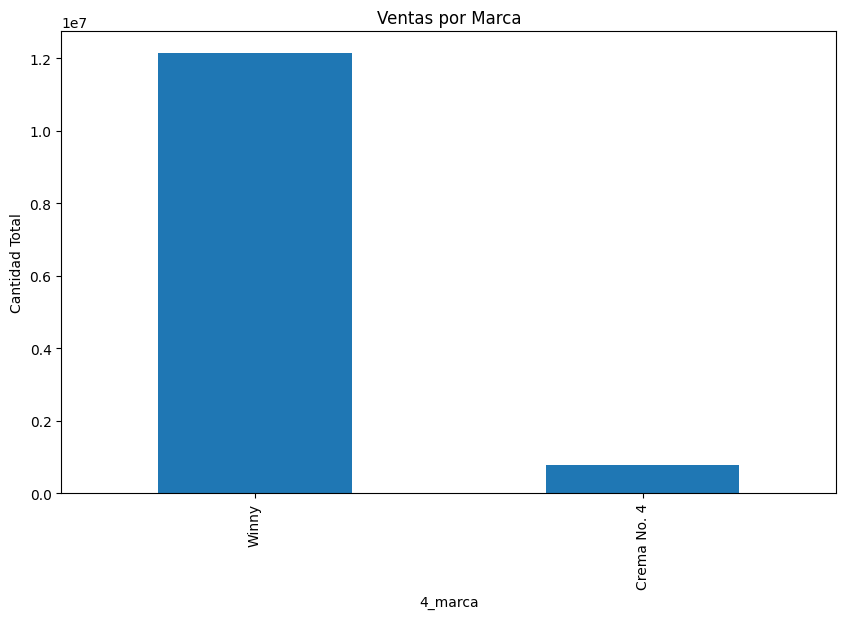

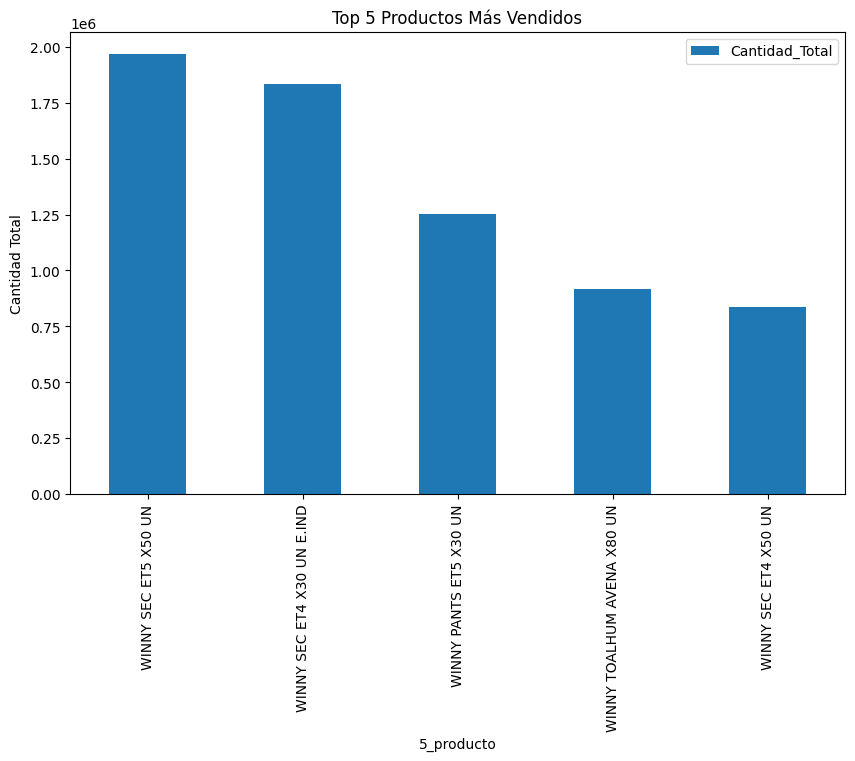

In [ ]:
# Distribución de ventas por marca
ventas_marca.plot(kind='bar', figsize=(10, 6), title="Ventas por Marca")
plt.ylabel("Cantidad Total")
plt.show()

# Top productos más vendidos
top_productos.set_index('5_producto').plot(kind='bar', figsize=(10, 6), title="Top 5 Productos Más Vendidos")
plt.ylabel("Cantidad Total")
plt.show()